In [3]:
from fastai.vision import *

# Download images from Google

Press `Ctrl` `Shift` `J` in Windows/Linux and `Cmd` `Opt` `J` in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.


```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [13]:
path = Path('data/bears')
classes = ['black', 'grizzly', 'teddy']

### Download images (only once!)

In [15]:
for bear in classes:
    
    text_file = path / ("urls_" + bear + ".txt")
    folder    = path / bear
    folder.mkdir(parents=True, exist_ok=True)
    
    download_images(text_file, folder, max_pics=200)
    verify_images(folder, delete=True, max_size=500)

black


grizzly


teddy


In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['black', 'grizzly', 'teddy']

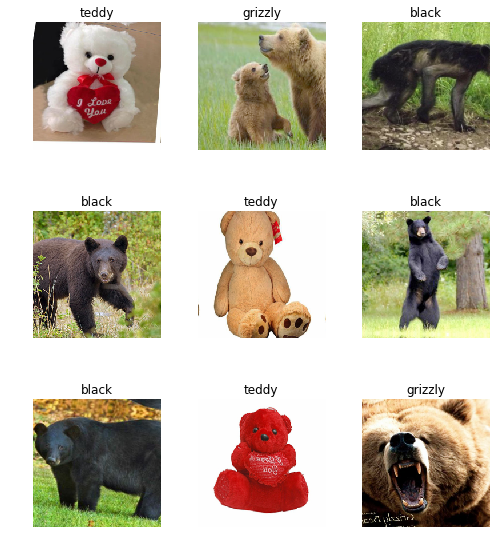

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddy'], 3, 220, 55)

## Train model

In [20]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,1.444251,0.769400,0.654545
2,0.861351,0.128298,0.945455
3,0.598509,0.090099,0.963636
4,0.457147,0.083863,0.963636


In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


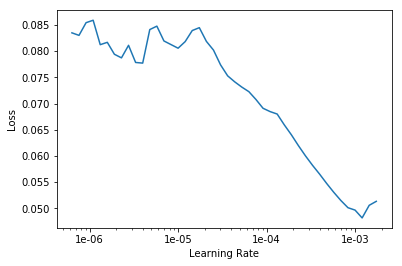

In [24]:
learn.recorder.plot()

In [33]:
learn.load('stage-1');
learn.unfreeze()

In [34]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy
1,0.084318,0.059656,0.963636
2,0.066470,0.055132,0.981818


In [35]:
learn.save('stage-2')

## Interpretation

In [36]:
learn.load('stage-2');

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

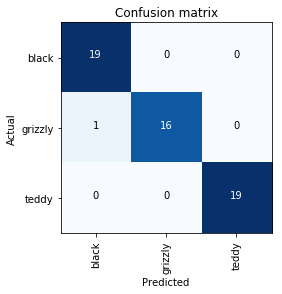

In [38]:
interp.plot_confusion_matrix()

## Cleaning Up

In [39]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [41]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## In production

In [44]:
learn.export()

AttributeError: 'Learner' object has no attribute 'export'